#Importing the data set

In order to obtain the set of data that we will fit we exectute the comand below to download it form the [GitHub repository](https://raw.githubusercontent.com/SandraToVa/TFM/main/prot_SP.dat).

We can save it with the name desired in our content file:

```
output = 'openme.dat'
```



In [ ]:
url = 'https://raw.githubusercontent.com/SandraToVa/TFM/main/prot_SP.dat'

In [ ]:
import gdown
output = 'openme.dat'
gdown.download(url, output, quiet=False)

Downloading...
From: https://raw.githubusercontent.com/SandraToVa/TFM/main/prot_SP.dat
To: /content/openme.dat
13.9kB [00:00, 4.04MB/s]                   


'openme.dat'

With the file saved we can open it and use it as we would normally do in Python.

In [ ]:
f = open("/content/openme.dat", "rt")
#f.readline()

The same could be done using pandas if wanted.

In [ ]:
import pandas as pd
df = pd.read_csv(url,header=None,index_col=None,sep='\t',engine='python')
#df

# Processing the data with the bootsrap and jacknife methods


In [ ]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/SandraToVa/TFM/main/prot_SP.dat'

In [ ]:
# Defining the constants
nsc = 29        #Number of configurations
nt = 21         #Time intervals
nboot = 30      #N_b


# Variables related to the constants
nsc_ = 1.0 / nsc
nsc1_ = 1.0 / (nsc - 1)
nboot_ = 1.0 / nboot
nbot_ = 1.0 / (nboot - 1)

In [ ]:
# Read the file
df = pd.read_csv(url,header=None,index_col=None,sep='\t',engine='python')

# Convert dataframe to numpy array
blck = df.values

# Calculate pmean: same for bootstrap and jacknife (depends on the dataset)
# Mean for each time (column)
pmean=np.zeros(nt+1)
for k in range(nt+1):
    pmean[k] = np.sum(blck[:, k]) * nsc_



## Bootstrap method

In [ ]:
# BOOTSTRAP METHOD

# Generate random numbers
x = np.random.rand(nsc, nboot)

# Pmean_boot=C_b(t)
pmean_boot=np.zeros((nboot,nt+1))
for k in range(nt+1):
    for j in range(nboot):
        boot = 0.0
        for i in range(nsc):
            boot += blck[int(x[i, j] * nsc), k]  # blck=C_rand(i,t)= randomly C_i(t)
        pmean_boot[j, k] = boot * nsc_

# Calculate EMpoint_boot=E_b(t)
kt=1    #lag parameter
EMpoint_boot=np.zeros((nboot,nt))
for k in range(nt):
    for j in range(nboot):
        EMpoint_boot[j, k] = np.log(pmean_boot[j, k] / pmean_boot[j, k + kt]) / kt


# Calculate mean for each time point (Sum E_b)
mean_boot=np.zeros(nt)
mean_boot = np.sum(EMpoint_boot, axis=0) * nboot_

# Calculate sigma for each time point
sigma_boot=np.zeros(nt)
for k in range(nt):
    sigm_boot = np.sqrt(np.sum((EMpoint_boot[:, k] - mean_boot[k]) ** 2) * nboot_ * nsc * nsc1_)


In [ ]:
# Saving the results as data frames

# Save mean and sigma
bootresults_df = pd.DataFrame({
    'Time': np.arange(nt),
    'Mean': mean_boot,
    'Sigma': sigm_boot
})
bootresults_df.to_csv('EMP_prot_boot.csv', index=False, float_format='%.6f')

# Save random numbers (x)
x_df = pd.DataFrame(x)
x_df.to_csv('EMP_prot_boot_x.csv', index=False, float_format='%.6f')

# Save EMpoint
bootempoint_df = pd.DataFrame(EMpoint_boot)
bootempoint_df.to_csv('EMP_prot_boot_param.csv', index=False, float_format='%.6f')

In [ ]:
# BOOTSTRAP RESULTS
bootresults_df

,Time,Mean,Sigma
0,0,1.226531,0.054465
1,1,1.224821,0.054465
2,2,1.206564,0.054465
3,3,1.199805,0.054465
4,4,1.202731,0.054465
5,5,1.190926,0.054465
6,6,1.201863,0.054465
7,7,1.210468,0.054465
8,8,1.182038,0.054465
9,9,1.183739,0.054465


## Jacknife method

In [ ]:
# JACKNIFE METHOD

# Pmean_jk
pmean_jk=np.zeros((nsc,nt+1))
for k in range(nt+1):
    for j in range(nsc):
        pmean_jk[j, k] = (pmean[k] * nsc - blck[j, k]) * nsc1_


# Calculate EMpoint_jk
kt=1
EMpoint_jk=np.zeros((nsc,nt))
for k in range(nt):
    for j in range(nsc):
        EMpoint_jk[j, k] = np.log(pmean_jk[j, k] / pmean_jk[j, k + kt]) / kt

# Calculate mean for each time point (Sum E_b)
mean_jk=np.zeros(nt)
mean_jk = np.sum(EMpoint_jk, axis=0) * nsc_

# Calculate sigma for each time point
sigma_jk=np.zeros(nt)
for k in range(nt):
    sigma_jk[k] = np.sqrt(np.sum((EMpoint_jk[:, k] - mean_jk[k]) ** 2) * nsc_ * (nsc - 1))


In [ ]:
# Saving the results as data frames

# Save mean and sigma
jkresults_df = pd.DataFrame({
    'Time': np.arange(nt),
    'Mean': mean_jk[:],
    'Sigma': sigma_jk[:]
})
jkresults_df.to_csv('EMP_prot_jk.csv', index=False, float_format='%.6f')

# Save EMpoint
jkempoint_df = pd.DataFrame(EMpoint_jk)
jkempoint_df.to_csv('EMP_prot_jk_param.csv', index=False, float_format='%.6f')

In [ ]:
# JACKNIFE RESULTS
jkresults_df

,Time,Mean,Sigma
0,0,1.226334,0.004596
1,1,1.223141,0.005925
2,2,1.208003,0.005550
3,3,1.198574,0.007751
4,4,1.200963,0.010802
5,5,1.189218,0.008126
6,6,1.201563,0.010625
7,7,1.210344,0.008418
8,8,1.185524,0.010114
9,9,1.184858,0.011576


# Effective mass

For the plots make sure latex is installed:

```
!latex --version
```

In [1]:
!latex --version

/bin/bash: line 1: latex: command not found


In [2]:
!apt-get install -y texlive texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
!sudo apt install texlive-fonts-extra cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius fonts-adf-universalis fonts-cabin
  fonts-cantarell fonts-comfortaa fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond fonts-ebgaramond-extra
  fonts-font-awesome fonts-freefont-otf fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum
  fonts-gfs-didot fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go fonts-junicode
  fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster fonts-lobstertwo
  fonts-noto-color-emoji fonts-noto-core fonts-noto-mono fonts-oflb-asana-math fonts-open-sans
  fonts-roboto-unhinted fonts-sil-charis fonts-sil-gentium fonts-sil-gentium-basic
  fonts-sil-gentiumplus fonts-sil-gentiumplus-compact fonts-stix fonts-texgyre fonts-urw-base35
  li

In [11]:
!sudo apt install dvipng -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  ghostscript
Suggested packages:
  ghostscript-x
The following NEW packages will be installed:
  dvipng ghostscript
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 128 kB of archives.
After this operation, 415 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 ghostscript amd64 9.55.0~dfsg1-0ubuntu5.9 [49.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dvipng amd64 1.15-1.1 [78.9 kB]
Fetched 128 kB in 0s (294 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This fronten

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math
import itertools
from scipy.optimize import curve_fit, minimize
import h5py
mpl.rcParams['text.usetex'] = True
%matplotlib inline
#import random #MI: millor fes servir np.random.normal
import matplotlib.patches as patches
from matplotlib.patches import Polygon

In [4]:
# Constants
nsc = 32        #Number of configurations
nt = 32         #Time intervals
nboot = nsc     #N_b

nsc_ = 1.0 / nsc
nsc1_ = 1.0 / (nsc - 1)
nboot_ = 1.0 / nboot
nbot_ = 1.0 / (nboot - 1)

Read the file .h5

In [5]:
# Check if file is good
def check_hdf5_file(file_path):
    try:
        with h5py.File(file_path, 'r') as fh5:
            print("File is readable and intact.")
            # Print the keys to confirm content is accessible
            print("Keys in the file:", list(fh5.keys()))
    except Exception as e:
        print(f"Error reading file: {e}")

check_hdf5_file('/content/drive/MyDrive/TAE 2024/TAE_latticeData.h5')

File is readable and intact.
Keys in the file: ['B0_A1u_b', 'B0_A1u_f', 'B1_G1g_b', 'B1_G1g_f', 'B2_A1g_b', 'B2_A1g_f']


In [6]:
# Read data from HDF5 file: example
with h5py.File('/content/drive/MyDrive/TAE 2024/TAE_latticeData.h5', 'r') as fh5:
    blck = 0.5 * (np.real(np.array(fh5['B0_A1u_f'][0:nsc, 0:nt]) +
                           np.array(fh5['B0_A1u_b'][0:nsc, 0:nt])))

## Plotting the correlator

Before fitting the effective masses we show the correlator of data.

Using the bootstrap method but reading the data from a .h5 file we compute the mean and sigma as we did there.

In [7]:
def mean_sigma(blck,nsc,nt,nboot):
    # Compute pmean using the numpy function mean for the nsc axis
    pmean=np.zeros((nboot,nt))
    pmean = np.mean(blck, axis=0)

    # Bootstrap sampling
    # Generate bootstrap indices
    pmeanboot=np.zeros((nboot,nt))
    x = np.random.uniform(size=(nsc, nboot))
    for k in range(nt):
        for j in range(nboot):
            for i in range(nsc):
                pmeanboot[j,k]+=blck[int(x[i,j]*nsc),k]
            pmeanboot[j,k]*=nsc_

    # Compute EMpoint
    kt = 1
    EMpoint=np.zeros((nboot,nt-kt))
    EMpoint = np.log(pmeanboot[:, :-kt] / pmeanboot[:, kt:]) / kt   # Shape (nboot, nt - kt)/Shape (nboot, nt - kt)

    # Compute mean and standard deviation of EMpoint
    mean = np.mean(EMpoint, axis=0)
    variance = np.mean((EMpoint - mean) ** 2, axis=0) * nsc * nsc1_
    sigma = np.sqrt(variance)

    # Compute mean and standard deviation of the correlator
    E_b=EMpoint.T

    mean_cor = np.mean(pmeanboot[:,:-1], axis=0)
    variance_cor = np.mean((pmeanboot[:,:-1] - mean_cor) ** 2, axis=0) * nsc * nsc1_
    sigma_cor = np.sqrt(variance_cor)

    return mean, sigma, mean_cor, sigma_cor, E_b

In [8]:
# Plot data
def plot_data(x_data, y_data_list, y_err_list, plot_title, xlabel, ylabel, xlim, scale, y_leg_list, legend, fit_line=None, fill_between=None):
    # Configure plot settings
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif', size='12')

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)

    ax.set_title(plot_title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xlim)
    ax.set_yscale(scale)
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')

    # Plot each dataset with error bars
    for i, (y_data, y_err, y_leg) in enumerate(zip(y_data_list, y_err_list, y_leg_list)):
        ax.errorbar(x_data, y_data, yerr=y_err, fmt='o', markersize=3, capsize=1, elinewidth=0.7, label=y_leg)

    if fit_line is not None:
        ax.plot(fit_line[0], fit_line[1], 'r-', label=f'fit: {fit_line[2]}')

    if fill_between is not None:
        ax.fill_between(fill_between[0], fill_between[1], fill_between[2], color='#ffcccc')

    if legend:
        ax.legend()

    # Display the plot
    plt.show()


Here we can plot the mean and the sigma for both the $E(t)$ ans also for the correlator.

In [13]:
# Read the data from the file

# Read the dinucleon
with h5py.File('/content/drive/MyDrive/TAE 2024/TAE_latticeData.h5', 'r') as fh5:
    blck_di = 0.5 * (np.real(np.array(fh5['B2_A1g_f'][0:nsc, 0:nt]) +
                           np.array(fh5['B2_A1g_b'][0:nsc, 0:nt])))
    blck_pro = 0.5 * (np.real(np.array(fh5['B1_G1g_f'][0:nsc, 0:nt]) +
                           np.array(fh5['B1_G1g_b'][0:nsc, 0:nt])))
    blck_pi = 0.5 * (np.real(np.array(fh5['B0_A1u_f'][0:nsc, 0:nt]) +
                           np.array(fh5['B0_A1u_b'][0:nsc, 0:nt])))


# Compute the mean and sigma for the mass and for the correlator
mean_di, sigma_di, mcor_di, scor_di, E_di = mean_sigma(blck_di, nsc, nt, nboot)
mean_pro, sigma_pro, mcor_pro, scor_pro, E_pro = mean_sigma(blck_pro, nsc, nt, nboot)
mean_pi, sigma_pi, mcor_pi, scor_pi, E_pi = mean_sigma(blck_pi, nsc, nt, nboot)
var_di=sigma_di**2
var_pro=sigma_pro**2
var_pi=sigma_pi**2

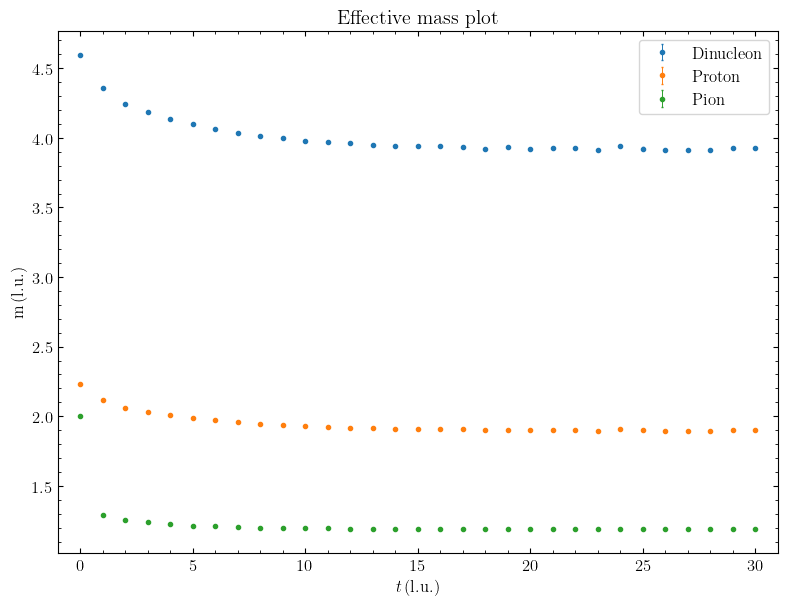

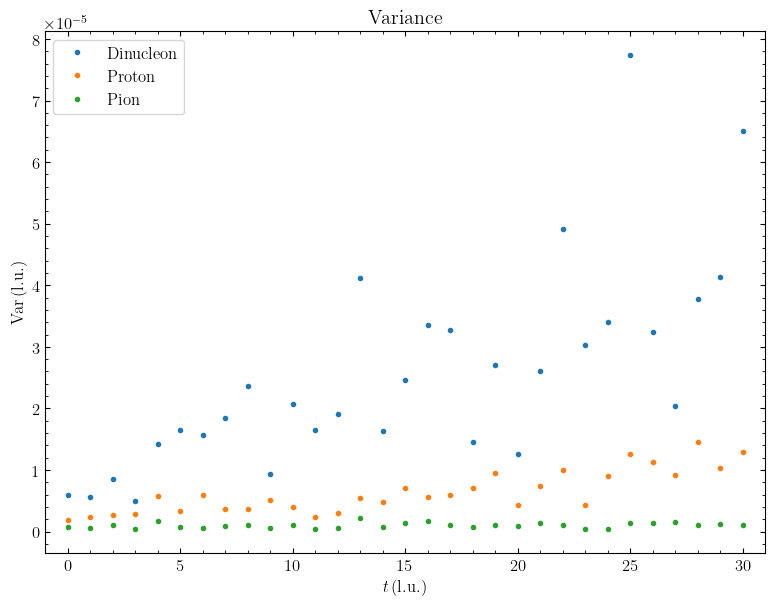

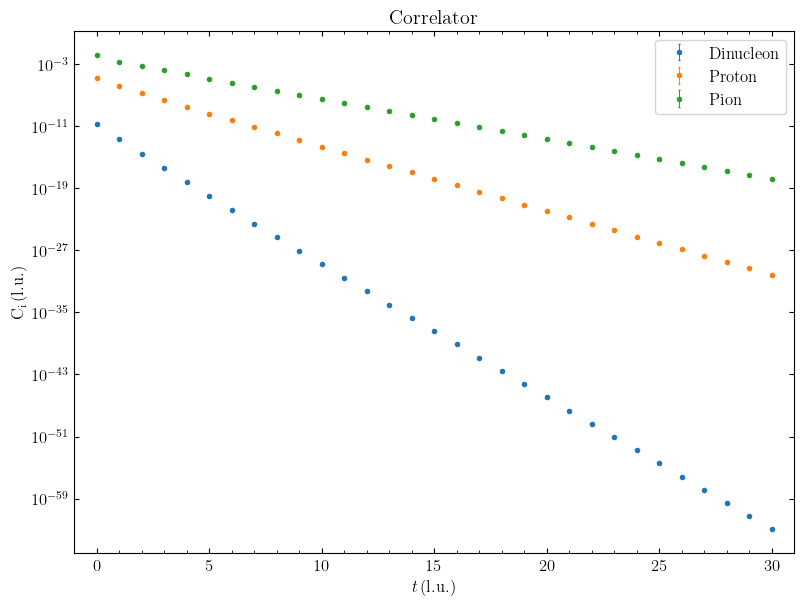

In [17]:
# Plot results m(t)
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[mean_di, mean_pro, mean_pi],
    y_err_list=[sigma_di, sigma_pro, sigma_pi],
    plot_title='Effective mass plot',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{m} \,\mathrm{(l.u.)}$',
    xlim=[-1, 31],
    scale='linear',
    y_leg_list=['Dinucleon', 'Proton', 'Pion'],
    legend=True
)

# Plot results variance
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[var_di, var_pro, var_pi],
    y_err_list=[None, None, None],
    plot_title='Variance',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{Var} \,\mathrm{(l.u.)}$',
    xlim=[-1, 31],
    scale='linear',
    y_leg_list=['Dinucleon', 'Proton', 'Pion'],
    legend=True
)

# Plot results correlator
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[mcor_di, mcor_pro, mcor_pi],
    y_err_list=[scor_di, scor_pro, scor_pi],
    plot_title='Correlator',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{C_i} \,\mathrm{(l.u.)}$',
    xlim=[-1, 31],
    scale='log',
    y_leg_list=['Dinucleon', 'Proton', 'Pion'],
    legend=True
)

## Fitting the data

Now we fit the data using a linear and an exponential fits

In [18]:
# Fit functions
def func_l(t, d):
    return d

def func_e(t, a, b, c):
    return a * np.exp(-b * t) + c

def func_e2(t, c):
    return c[0] * np.exp(-c[1] * t) + c[2]

## Pion example

We plot the pion effective mass to more or less understad where to make the fits.

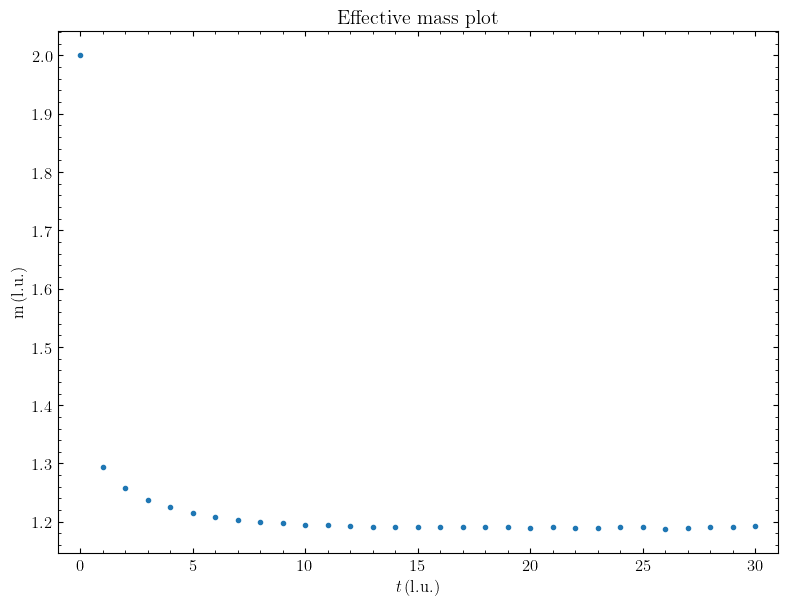

In [19]:
# Data computed for the pion example
E_b=E_pi
xboot=np.arange(nt-1)
yboot=mean_pi
eboot=sigma_pi
xboot_cor=np.arange(nt-1)
yboot_cor=mcor_pi
eboot_cor=scor_pi

plot_data(
    x_data=xboot,
    y_data_list=[yboot],
    y_err_list=[eboot],
    plot_title='Effective mass plot',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{m} \,\mathrm{(l.u.)}$',
    xlim=[-1, 31],
    scale='linear',
    y_leg_list=['Pion'],
    legend=False
)


In [24]:
# Defining the time intervals
# Define the range for the fits
initial_t=7
final_t=25
interval_size=7

# Initialize the count of intervals
num_intervals = 0
# Loop through each possible starting point
for start in range(initial_t, final_t + 1):
    # Calculate the maximum length possible for intervals starting from `start`
    max_length = final_t - start + 1

    # Calculate how many intervals can be formed starting at `start` with minimum size `interval_size`
    num_intervals += max(0, max_length - interval_size + 1)

In [25]:
# Initializate the arrays
counter_i=0
#chi square
chi2_l=[[]for i in range(num_intervals)] #lineal
chi2_e=[[]for i in range(num_intervals)]
#valor central
central_l=[[]for i in range(num_intervals)]
central_e=[[]for i in range(num_intervals)]
#error estadistic
sigma_l=[[]for i in range(num_intervals)]
sigma_e=[[]for i in range(num_intervals)]
#Llita en los fits de cada ajust
fit_l=[[]for i in range(num_intervals)]
fit_e=[[]for i in range(num_intervals)]

millor_chi2_l=100.   #per saber quin es el millor ajust
millor_chi2_e=100.

# Compute the covariance matrix
cov_t=np.zeros((nt-1,nt-1))
for l in range(0,nt-1): #l rows of cov, t
    for c in range(0,nt-1): #c columns of cov, t'
        sum=0
        for p in range(0,nboot): #sumatori de les b per acada element de la matriu t,t'
            sum+=(E_b[l][p]-yboot[l])*(E_b[c][p]-yboot[c])
        cov_t[l][c]=sum*(nsc/(nsc-1))/nboot
cov_t=np.array(cov_t)

In [28]:
for i in range(initial_t, final_t-interval_size):
    #Lo valor minim del interval es 5
    counter_f=0
    for f in range(i+interval_size,final_t):

        #Mida de l'interval
        j=f-i+1
        #Matriu de covariància per a cada interval de Temps=cov
        cov=[]
        cov=cov_t[i-1:f,i-1:f]
        cov_=np.linalg.inv(cov)     #inversa de la matriu covariant
        #Trobem lo millor fit minimitzant la chi2
        #Com la matriu cov ja esta feta per a aquest interval de temps corresponent, creo dos contadors: n,m
        fun_chi_l = lambda c: np.sum([
            (yboot[x-1] - func_l(x-1, c)) * cov_[n][m] * (yboot[y-1] - func_l(y-1, c))
            for n, x in enumerate(range(i, f + 1))
            for m, y in enumerate(range(i, f + 1))
        ])

        fun_chi_e = lambda c: np.sum([
            (yboot[x-1] - func_e2(x-1, c)) * cov_[n][m] * (yboot[y-1] - func_e2(y-1, c))
            for n, x in enumerate(range(i, f + 1))
            for m, y in enumerate(range(i, f + 1))
        ])

        c0=[1.25] #First guess de la c

        x0=[1.,1.,1.25] #First guesses de la a,b,c
        bnds=((0.,1.),(-20.,20.),(-3.,3.))#Mateixos bounds que usats antes

        #Lineal
        res_l=minimize(fun_chi_l,c0,method='Nelder-Mead',tol=1e-6)
        c_l=res_l.x
        central_l[counter_i].append(c_l[0])
        fit_l[counter_i].append(c_l)
        #Exponencial
        res_e=minimize(fun_chi_e,x0,method='Nelder-Mead',bounds=bnds,tol=1e-6)
        c_e=res_e.x
        central_e[counter_i].append(c_e[2])
        fit_e[counter_i].append(c_e)

        #En aixó hem trobat los valors de les c i c_llista que minimitzen la chi2
        #Ara calculem la chi en estos valors
        #Graus de llibertat=(sample size=j=mida del interval) - parametres
        dof_l=j-1
        dof_e=j-3
        chi_l=fun_chi_l(res_l.x[0])/dof_l
        chi2_l[counter_i].append(chi_l)
        chi_e=fun_chi_e(res_e.x)/dof_l
        chi2_e[counter_i].append(chi_e)


        #Ajust del fit minimitzant la chi2 ymin=c
        cmin_l=[] #Llista en les c que per cada b dona la chib minima
        cmin_e=[] #Llista per a a b i c ja que ho usare per a trobar els quantiles
        amin_e=[]
        bmin_e=[]
        sigma_estad_l=0
        sigma_estad_e=0
        for b in range(0,nboot): #Llista de les chi2 minimes per a cada b

            fun_chib_l = lambda c: np.sum([
                (E_b[x-1][b] - func_l(x-1, c)) * cov_[n][m] * (E_b[y-1][b] - func_l(y-1, c))
                for n, x in enumerate(range(i, f + 1))
                for m, y in enumerate(range(i, f + 1))
            ])

            fun_chib_e = lambda c: np.sum([
                (E_b[x - 1][b] - func_e2(x - 1, c)) * cov_[n][m] * (E_b[y - 1][b] - func_e2(y - 1, c))
                for n, x in enumerate(range(i, f + 1))
                for m, y in enumerate(range(i, f + 1))
            ])

            c0=[1.95] #First guess de la c

            x0=[0.,1.,1.95] #First guesses de la a,b,c
            bnds=((0.,1.),(-20.,20.),(-3.,3.))#Mateixos bounds que usats antes

            #Lineal
            res_l=minimize(fun_chib_l,c0,method='Nelder-Mead',tol=1e-6)
            c_m_l=res_l.x[0]
            cmin_l.append(c_m_l)
            #Exponencial
            res_e=minimize(fun_chib_e,x0,method='Nelder-Mead',bounds=bnds,tol=1e-6)
            c_m_e=res_e.x[2]
            cmin_e.append(c_m_e)
            amin_e.append(res_e.x[0])
            bmin_e.append(res_e.x[1])


        #Ara per a fer lo pas 6, ordenem la llista de cmin i calculem lo 5/6 i 1/6 quartil
        #lineal
        cmin_l.sort()   #ordeno la llista de petit a gran
        cmin_l=np.array(cmin_l)
        cmin_l=[elemento - c_l[0] for elemento in cmin_l]    #llista de les c-\bar{c}
        q_5=0
        q_1=0

        q_5=np.quantile(cmin_l,5./6)
        q_1=np.quantile(cmin_l,1./6)

        #Calculem la sigma
        sigma_estad_l=(q_5-q_1)/2

        #exponencial
        #Per a l'exponencial cal fer los quantiles de a b i class: a+delta_a, b+delta_b i c+delta_c
        #c_e es la llista que conte a b i c
        #delta_e contindrà les deltes
        delta_e=[]
        cmin_e.sort()
        amin_e.sort()
        bmin_e.sort()
        cmin_e=np.array(cmin_e)
        amin_e=np.array(amin_e)
        bmin_e=np.array(bmin_e)
        #a i delta_a
        amin_e=[elemento - c_e[0] for elemento in amin_e]
        q_5=0
        q_1=0
        q_5=np.quantile(amin_e,5./6)
        q_1=np.quantile(amin_e,1./6)

        delta_a=(q_5-q_1)/2
        delta_e.append(delta_a)
        #b i delta_b
        bmin_e=[elemento - c_e[1] for elemento in bmin_e]
        q_5=0
        q_1=0
        q_5=np.quantile(bmin_e,5./6)
        q_1=np.quantile(bmin_e,1./6)

        delta_b=(q_5-q_1)/2
        delta_e.append(delta_b)
        #c i delta_c
        cmin_e=[elemento - c_e[2] for elemento in cmin_e]
        q_5=0
        q_1=0
        q_5=np.quantile(cmin_e,5./6)
        q_1=np.quantile(cmin_e,1./6)

        delta_c=(q_5-q_1)/2
        delta_e.append(delta_c)
        #Genero 1000 numeros aleatoris en distribu gaussiana on mu=a,b,c i sigma=delta_a,b,c
        f_sup=[]    #llista dels valors per a cada t del quantile 5/6
        f_inf=[]    # """" 1/6
        t_errors=np.linspace(i,f,f-i)

        # MI: calcular primer els valors aleatoris
        a=np.random.normal(c_e[0],delta_e[0],1000)
        b=np.random.normal(c_e[1],delta_e[1],1000)
        c=np.random.normal(c_e[2],delta_e[2],1000)
        for t in range(i,f):
            f_t=[]  #f_t=llista de el valor de la funció usant los 1000 numeros aleatoris
            for n in range(0,1000):
                f_t.append(func_e(t,a[n],b[n],c[n]))

            f_t.sort()
            f_t=np.array(f_t)                #ordeno la Llista

            q_5=np.quantile(f_t,5./6)
            q_1=np.quantile(f_t,1./6)
            f_sup.append(q_5)
            f_inf.append(q_1)

        #Calculem la sigma estadistica = delta_c
        sigma_estad_e=delta_e[2]

        #Afegim a les matrius el valor estadistic
        sigma_l[counter_i].append(sigma_estad_l)
        sigma_e[counter_i].append(sigma_estad_e)

        #Per fer el plot dels ajustos
        xplot=np.linspace(i,f,num=(f-i)*100)
        yplot_l=[]
        for num in range(0,(f-i)*100):
            yplot_l.append(func_l(xplot, c_l[0]))
        yplot_e=func_e(xplot, c_e[0],c_e[1],c_e[2])


        plt.rc('text', usetex=True)
        plt.rc('font', family='serif', size='12')

        fig = plt.figure(figsize=(8,6))

        plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)

        #########################            #No cal fer un gràfic cada vegada pero m'ajuda a visualitzar l'ajust -> Cal canviar-ho quan tot vagi be
            #PLOT LINEAL
        fig1 = fig.add_subplot(1,1,1)
        fig1.set_title("Effective mass plot lineal")
        fig1.set_ylabel(r'$\mathrm{m} \,\mathrm{(l.u.)}$')
        fig1.set_xlabel(r'$t \,\mathrm{(l.u.)}$')
        fig1.set_xlim([0,nt])
        #plt.xticks([5,10,15,20])
        plt.minorticks_on()
        fig1.axes.tick_params(which='both',direction='in')
        fig1.yaxis.set_ticks_position('both')
        fig1.xaxis.set_ticks_position('both')
        fig1.errorbar(xboot,yboot, yerr=eboot, c='#ED553B', ls='None', marker='o', markersize=6, capsize=1, elinewidth=0.7,label="Bootstrap")
        ##fig1.errorbar(xjack,yjack, yerr=ejack, c='#20639B', ls='None', marker='o', markersize=6, capsize=1, elinewidth=0.7,label="Jackknive")
        #Plot del ajust
        plt.plot(xplot, yplot_l, 'r-', label='fit: c=%5.3f' % tuple(c_l))
        #Error de l'ajust (només l'estadistic)
        fig1.add_patch(
            patches.Rectangle(
                (i, c_l[0]-sigma_estad_l), #Esquina inferior izquierda
                f-i,                        #Ancho
                2*sigma_estad_l,
                edgecolor = 'white',
                facecolor = '#ffcccc',
                fill=True
                ) )
        plt.legend()
        plt.show()

        #PLOT EXPONENCIAL
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif', size='12')

        fig = plt.figure(figsize=(8,6))

        plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)
        fig1 = fig.add_subplot(1,1,1)

        fig1.set_title("Effective mass plot exponencial")
        fig1.set_ylabel(r'$\mathrm{m} \,\mathrm{(l.u.)}$')
        fig1.set_xlabel(r'$t \,\mathrm{(l.u.)}$')
        fig1.set_xlim([0,nt])
        #plt.xticks([5,10,15,20])
        plt.minorticks_on()
        fig1.axes.tick_params(which='both',direction='in')
        fig1.yaxis.set_ticks_position('both')
        fig1.xaxis.set_ticks_position('both')
        fig1.errorbar(xboot,yboot, yerr=eboot, c='#ED553B', ls='None', marker='o', markersize=6, capsize=1, elinewidth=0.7,label="Bootstrap")
        ##fig1.errorbar(xjack,yjack, yerr=ejack, c='#20639B', ls='None', marker='o', markersize=6, capsize=1, elinewidth=0.7,label="Jackknive")
        #Plot del ajust
        plt.plot(xplot, yplot_e, 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(c_e))
        #Error de l'ajust (només l'estadistic)
        plt.fill_between(t_errors, f_sup, f_inf, color='#ffcccc') #MI: el representa la banda, en comptes de les dues linies

        plt.legend()
        plt.show()

        #Aguardo les dades del millor fit
        #millor_c_l, milllor_c_e, millor_f_sup, millor_f_inf, millor_sigma_estad_l, millor_sigma_estad_e
        if millor_chi2_l>chi_l:
            millor_i_l=i
            millor_f_l=f
            millor_c_l=c_l
            millor_sigma_estad_l=sigma_estad_l
            millor_chi2_l=chi_l

        if millor_chi2_e>chi_e:
            millor_i_e=i
            millor_f_e=f
            millor_c_e=c_e
            millor_sigma_estad_e=sigma_estad_e
            millor_f_sup=f_sup
            millor_f_inf=f_inf
            millor_chi2_e=chi_e

        print(counter_i,counter_f)
        counter_f += 1
    counter_i += 1



Output hidden; open in https://colab.research.google.com to view.

Best fits:

LINEAL###############################
* chi2 = [[60.05687907551737, 83.0338953332753, 137.90941086384933, 161.07735897877387, 146.43506058705935, 60.0568790778432, 83.03389512904413, 137.90941089652924, 161.07735876106764, 146.435060762909, 60.0568790778432, 83.03389512904413, 137.90941089652924, 161.07735876106764, 146.435060762909, 144.33047968276983, 133.78645600287697, 129.98579813490053, 122.9313657807551, 153.49058679737226, 148.19994046054478], [30.645946825248334, 43.63647127921073, 57.76423738837492, 55.35682927297197, 51.761197743414826, 50.139539627002556, 58.63861392251612, 61.31011971550577, 58.014680383726954, 54.39042132155968], [31.568369014785883, 29.200622329022224, 25.983954570902274, 26.175473889563698, 23.845810082799325, 35.842726113570556, 33.71658720147664, 31.33720935807317, 30.44116663660901], [17.403189047158293, 15.25238756984075, 14.92363282508773, 14.398741164633417, 17.647714848657845, 16.229431486750812, 14.983513510317401, 14.167509659795702], [8.976779

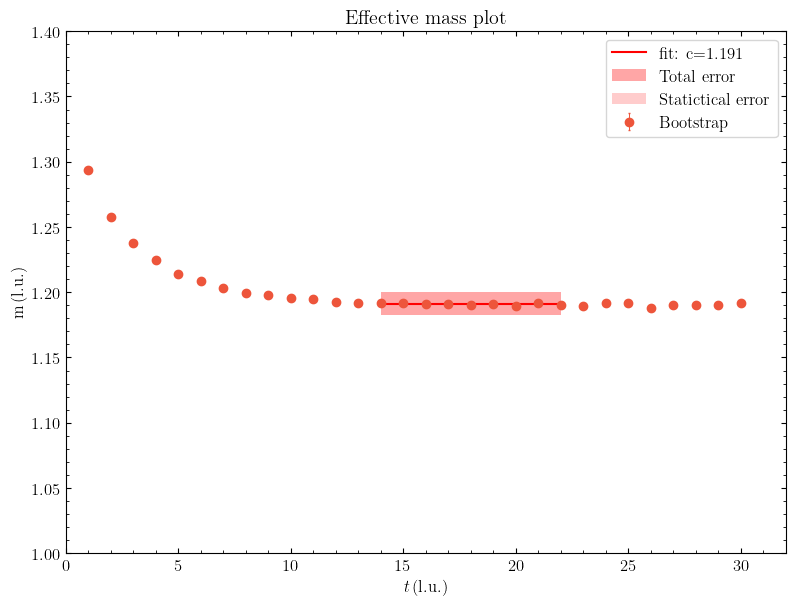

EXPONENCIAL###############################
* chi2 = [[60.05012526191285, 83.0261775918859, 137.898578101107, 161.0654150330704, 146.4242076118601, 60.055647998089555, 83.03251535703744, 137.90697830151032, 161.07462578421422, 146.43257442574063, 0.43821374354761955, 0.41285322178790695, 0.36769301158840356, 0.3689028372129167, 0.36168163913503215, 0.34270733661051844, 0.3593814417189046, 0.37405572979472257, 0.6885307218292136, 0.7703251915114234, 1.1030448035676432], [0.438356312575901, 0.39214982163044143, 0.40959045422583523, 0.3973012158573725, 0.369517014438669, 0.38920077122427926, 0.3990085107136648, 0.7138625447666164, 0.7468686842367052, 0.9445640513424387], [0.28047094268732187, 2.2272685065971847, 0.35895760315366954, 0.32540295873097536, 1.9647813256717654, 2.0689893834514996, 2.4008583073276744, 0.7342431546281396, 0.7618893677104133], [0.24357859249534566, 0.23410881294330022, 0.23715454031661018, 0.2134597992447532, 0.28844747185963066, 0.6088863219676101, 0.691699711889

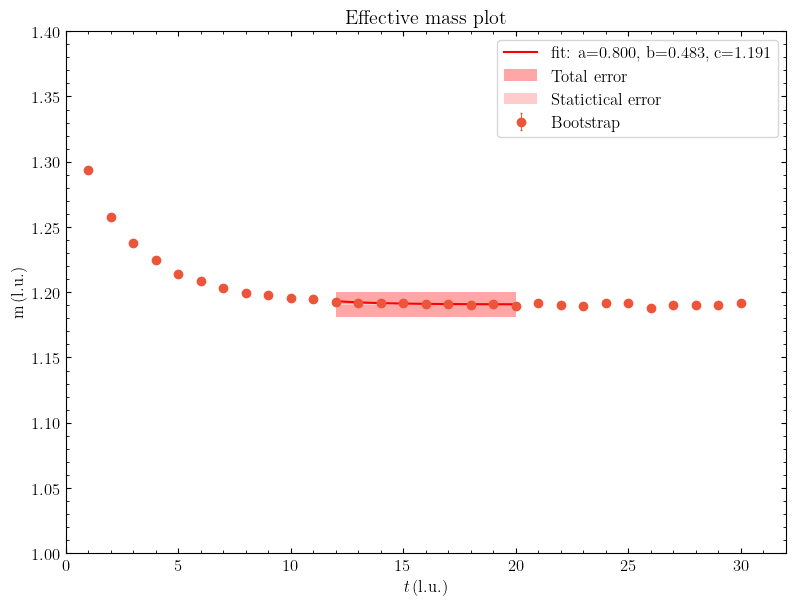

In [32]:
print('LINEAL###############################')
print('* chi2 =',chi2_l)
print('* central =',central_l)
#print('* fit =',fit_l)  #Comprovo que es lo mateix q el central
print('* error estadistic =',sigma_l)

#Millor resultat
#Lo ajust lineal 0,1 te la chi2 més baixa en 7.263617072777405
#Per al error sistematic
#Lo calcul de l'error sistematic es algo que faig ara al final despres de haver fet tota la resta. Agafo el millor fit: 40 que dona valor central[3][0]=1.1995200365039278
#Restem aquest numero en tots los elements de la llista central
flat_central=itertools.chain(*central_l) #Fem que central sigue una sola llista
flat_central=list(flat_central)
sistematic=[elemento - millor_c_l[0] for elemento in flat_central]
#Error sistematic es lo maxim error de la llista
sist_l=max(sistematic)
print('* error sistemàtic =',sist_l)
#L'eror total es
sigma_t_l=math.sqrt(sist_l**2+millor_sigma_estad_l**2)

print('Best lineal fit')
print('* best chi2 =',millor_chi2_l)

#MILLOR PLOT LINEAL
#Per fer el plot dels ajustos
xplot=np.linspace(millor_i_l,millor_f_l,num=(millor_f_l-millor_i_l)*100)
yplot_l=[]
for num in range(0,(millor_f_l-millor_i_l)*100):
    yplot_l.append(func_l(xplot, millor_c_l[0]))


plt.rc('text', usetex=True)
plt.rc('font', family='serif', size='12')

fig = plt.figure(figsize=(8,6))

plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)
fig1 = fig.add_subplot(1,1,1)

fig1.set_title("Effective mass plot")
fig1.set_ylabel(r'$\mathrm{m} \,\mathrm{(l.u.)}$')
fig1.set_xlabel(r'$t \,\mathrm{(l.u.)}$')
fig1.set_ylim([1,1.4])
fig1.set_xlim([0,nt])
#plt.xticks([5,10,15,20])
plt.minorticks_on()
fig1.axes.tick_params(which='both',direction='in')
fig1.yaxis.set_ticks_position('both')
fig1.xaxis.set_ticks_position('both')
fig1.errorbar(xboot,yboot, yerr=eboot, c='#ED553B', ls='None', marker='o', markersize=6, capsize=1, elinewidth=0.7,label="Bootstrap")
##fig1.errorbar(xjack,yjack, yerr=ejack, c='#20639B', ls='None', marker='o', markersize=6, capsize=1, elinewidth=0.7,label="Jackknive")
#Plot del ajust
plt.plot(xplot, yplot_l, 'r-', label='fit: c=%5.3f' % tuple(millor_c_l))
#Error de l'ajust (estad+sistematic)
fig1.add_patch(
    patches.Rectangle(
        (millor_i_l, millor_c_l[0]-sigma_t_l), #Esquina inferior izquierda
        millor_f_l-millor_i_l,                        #Ancho
        2*sigma_t_l,
        linewidth=0,
        facecolor = '#ffa6a6',
        fill=True,
        label='Total error'
        ) )
#Error només estadistic
fig1.add_patch(
    patches.Rectangle(
        (millor_i_l, millor_c_l[0]-millor_sigma_estad_l), #Esquina inferior izquierda
        millor_f_l-millor_i_l,                        #Ancho
        2*millor_sigma_estad_l,
        linewidth=0,
        facecolor = '#ffcccc',
        fill=True,
        label='Statictical error'
        ) )
plt.legend()
plt.show()

print('EXPONENCIAL###############################')
print('* chi2 =',chi2_e)
print('* central =',central_e)
#print('* fit =',fit_e)
print('* error estadistic =',sigma_e)

#Millor resultat
#Lo ajust lineal 6,0 te la chi2 més baixa en 7.987054040388158
#Per al error sistematic
#Lo calcul de l'error sistematic es algo que faig ara al final despres de haver fet tota la resta. Agafo el millor fit: 40 que dona valor central[3][0]=1.1995200365039278
#Restem aquest numero en tots los elements de la llista central
flat_central=itertools.chain(*central_e) #Fem que central sigue una sola llista
flat_central=list(flat_central)
sistematic=[elemento - millor_c_e[2] for elemento in flat_central]
#Error sistematic es lo maxim error de la llista
sist_e=max(sistematic)
print('* error sistemàtic =',sist_e)
sigma_t_e=math.sqrt(sist_e**2+millor_sigma_estad_e**2)

print('Best lineal fit')
print('* best chi2 =',millor_chi2_e)

#Per fer el plot dels ajustos
#MILLOR PLOT EXPONENCIAL
xplot=np.linspace(millor_i_e,millor_f_e,num=(millor_f_e-millor_i_e)*100)
yplot_e=func_e(xplot, millor_c_e[0],millor_c_e[1],millor_c_e[2])
t_errors=np.linspace(millor_i_e,millor_f_e,millor_f_e-millor_i_e)

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size='12')

fig = plt.figure(figsize=(8,6))

plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)
fig1 = fig.add_subplot(1,1,1)

fig1.set_title("Effective mass plot")
fig1.set_ylabel(r'$\mathrm{m} \,\mathrm{(l.u.)}$')
fig1.set_xlabel(r'$t \,\mathrm{(l.u.)}$')
fig1.set_ylim([1,1.4])
fig1.set_xlim([0,nt])
#plt.xticks([5,10,15,20])
plt.minorticks_on()
fig1.axes.tick_params(which='both',direction='in')
fig1.yaxis.set_ticks_position('both')
fig1.xaxis.set_ticks_position('both')
fig1.errorbar(xboot,yboot, yerr=eboot, c='#ED553B', ls='None', marker='o', markersize=6, capsize=1, elinewidth=0.7,label="Bootstrap")
##fig1.errorbar(xjack,yjack, yerr=ejack, c='#20639B', ls='None', marker='o', markersize=6, capsize=1, elinewidth=0.7,label="Jackknive")
#Plot del ajust
plt.plot(xplot, yplot_e, 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(millor_c_e))
#Error de l'ajust
fig1.add_patch(
    patches.Rectangle(
        (millor_i_e, millor_c_e[2]-sigma_t_e), #Esquina inferior izquierda
        millor_f_e-millor_i_e,                        #Ancho
        2*sigma_t_e,
        linewidth=0,
        facecolor = '#ffa6a6',
        fill=True,
        label='Total error'
        ) )
#Error només estadistic
fig1.add_patch(
    patches.Rectangle(
        (millor_i_e, millor_c_e[2]-millor_sigma_estad_e), #Esquina inferior izquierda
        millor_f_e-millor_i_e,                        #Ancho
        2*millor_sigma_estad_e,
        linewidth=0,
        facecolor = '#ffcccc',
        fill=True,
        label='Statictical error'
        ) )
#plt.fill_between(t_errors, sigma_t_e_sup, sigma_t_e_inf, color='#ffa6a6', label='Total error', alpha=1) #MI: el representa la banda, en comptes de les dues linies


plt.legend()
plt.show()